In [1]:
!pip install keras

  Running setup.py bdist_wheel for keras: started
  Running setup.py bdist_wheel for keras: finished with status 'done'
  Stored in directory: C:\Users\BIG DATA\AppData\Local\pip\Cache\wheels\48\82\42\f06a8c03a8f95ada523a81ba723e89f059693e6ad868d09727
  Running setup.py bdist_wheel for theano: started
  Running setup.py bdist_wheel for theano: finished with status 'done'
  Stored in directory: C:\Users\BIG DATA\AppData\Local\pip\Cache\wheels\d5\5b\93\433299b86e3e9b25f0f600e4e4ebf18e38eb7534ea518eba13
Successfully built keras theano


In [4]:
import os
os.environ['KERAS_BACKEND']='theano'     #tensorflow     #改變os的環境變數
import keras

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


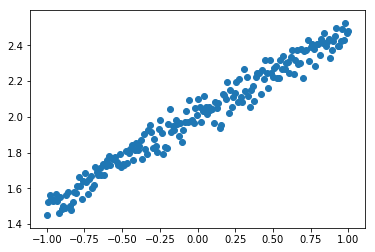

Training -----------
train cost:  4.190890312194824
train cost:  0.002621561288833618
train cost:  0.002621428342536092
train cost:  0.002621428342536092
train cost:  0.002621428342536092
train cost:  0.002621428342536092
train cost:  0.002621428342536092
train cost:  0.002621428342536092
train cost:  0.002621428342536092
train cost:  0.002621428342536092

Testing ------------
40/40 [==============================] - 0s
test cost: 0.00324739143252
Weights= [[ 0.49136066]] 
biases= [ 2.00406361]


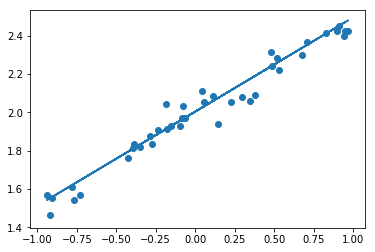

In [10]:
#regression
import numpy as np
np.random.seed(1337)  # for reproducibility  使用同一個隨機變數
from keras.models import Sequential    #神經層
from keras.layers import Dense         
import matplotlib.pyplot as plt

# create some data
X = np.linspace(-1, 1, 200)     #建立1*200的array   -1~1分成200等份
np.random.shuffle(X)    # randomize the data   洗牌

#s = np.random.normal(mu, sigma, size)    常態分配
#    mu = 0  ;  p(-0.05<X<0.05)=65%
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))
#type(Y)   array
#創造散點圖數據

# plot data
plt.scatter(X, Y)
plt.show()

#訓練神經網路
X_train, Y_train = X[:160], Y[:160]     # first 160 data points
#測試
X_test, Y_test = X[160:], Y[160:]       # last 40 data points

# build a neural network from the 1st layer to the last layer
# 定义模型
model = Sequential()

model.add(Dense(output_dim=1, input_dim=1))    
#Dense 全连接神经层。参数有两个，一个是输入数据和输出数据的维度，本代码的例子中 x 和 y 是一维的。
# 如果需要添加下一个神经层的时候，不用再定义输入的纬度，因为它默认就把前一层的输出作为当前层的输入。

# choose loss function and optimizing method
# 误差函数用的是 mse 均方误差；优化器用的是 sgd 随机梯度下降法
model.compile(loss='mse', optimizer='sgd')   #標準差 ; 亂序+一批一批 

# training
# 训练的时候用 model.train_on_batch 一批一批的训练 X_train, Y_train。默认的返回值是 cost，每100步输出一下结果。
print('Training -----------')
for step in range(1000):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('train cost: ', cost)     #輸出學習誤差

# test
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)

# weights 和 biases 是取在模型的第一层 model.layers[0] 学习到的参数。
# 从学习到的结果你可以看到, weights 比较接近0.5，bias 接近 2
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)    #Weights 權重  biases 偏向

# plotting the prediction   与测试集的值进行对比
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)     #Y_test compare with Y_pred
plt.show()


In [12]:
import os
os.getcwd()

'C:\\jupyter\\ML'

In [17]:
#Classifier
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist   #mnist data
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop

# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28px), y shape (10,000, )
#60000個data  10000個label

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# data pre-processing
X_train = X_train.reshape(X_train.shape[0], -1) / 255.   # normalize
                      #60000*.shape[0] 28*28 / 255
#     每个像素都是在 0 到 255 之间的，标准化之后就变成了 0 到 1 之间。
X_test = X_test.reshape(X_test.shape[0], -1) / 255.      # normalize
#  y 是一个数值，在 0-9 之间，现在是一个大小为 10 的向量，它属于哪个数字，就在哪个位置为 1，其他位置都是 0。

y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

# Another way to build your neural net
model = Sequential([
    Dense(32, input_dim=784),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

# Another way to define your optimizer
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# We add metrics to get more results you want to see
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print('Training ------------')
# Another way to train the model
model.fit(X_train, y_train, epochs=2, batch_size=32)

print('\nTesting ------------')
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, y_test)

print('test loss: ', loss)
print('test accuracy: ', accuracy)


Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [12]:
#CNN
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# data pre-processing
X_train = X_train.reshape(-1, 1,28, 28)/255.
X_test = X_test.reshape(-1, 1,28, 28)/255.
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

# Another way to build your CNN
model = Sequential()

# Conv layer 1 output shape (32, 28, 28)
model.add(Convolution2D(
    batch_input_shape=(64, 1, 28, 28),
    filters=32,
    kernel_size=5,
    strides=1,
    padding='same',     # Padding method
    data_format='channels_first',
))
model.add(Activation('relu'))

# Pooling layer 1 (max pooling) output shape (32, 14, 14)
model.add(MaxPooling2D(
    pool_size=2,
    strides=2,
    padding='same',    # Padding method
    data_format='channels_first',
))

# Conv layer 2 output shape (64, 14, 14)
model.add(Convolution2D(64, 5, strides=1, padding='same', data_format='channels_first'))
model.add(Activation('relu'))

# Pooling layer 2 (max pooling) output shape (64, 7, 7)
model.add(MaxPooling2D(2, 2, 'same', data_format='channels_first'))

# Fully connected layer 1 input shape (64 * 7 * 7) = (3136), output shape (1024)
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))

# Fully connected layer 2 to shape (10) for 10 classes
model.add(Dense(10))
model.add(Activation('softmax'))

# Another way to define your optimizer
adam = Adam(lr=1e-4)

# We add metrics to get more results you want to see
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print('Training ------------')
# Another way to train the model
model.fit(X_train, y_train, epochs=1, batch_size=64,)

print('\nTesting ------------')
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, y_test)

print('\ntest loss: ', loss)
print('\ntest accuracy: ', accuracy)


Training ------------


ERROR (theano.gof.opt): Optimization failure due to: local_abstractconv_check
ERROR (theano.gof.opt): node: AbstractConv2d{convdim=2, border_mode='half', subsample=(1, 1), filter_flip=True, imshp=(64, 1, 28, 28), kshp=(32, 1, 5, 5), filter_dilation=(1, 1)}(/conv2d_1_input, InplaceDimShuffle{3,2,0,1}.0)
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\theano\gof\opt.py", line 1982, in process_node
    replacements = lopt.transform(node)
  File "C:\Anaconda3\lib\site-packages\theano\tensor\nnet\opt.py", line 615, in local_abstractconv_check
    node.op.__class__.__name__)
AssertionError: AbstractConv2d Theano optimization failed: there is no implementation available supporting the requested options. Did you exclude both "conv_dnn" and "conv_gemm" from the optimizer? If on GPU, is cuDNN available and does the GPU support it? If on CPU, do you have a BLAS library installed Theano can link against?



AssertionError: AbstractConv2d Theano optimization failed: there is no implementation available supporting the requested options. Did you exclude both "conv_dnn" and "conv_gemm" from the optimizer? If on GPU, is cuDNN available and does the GPU support it? If on CPU, do you have a BLAS library installed Theano can link against?

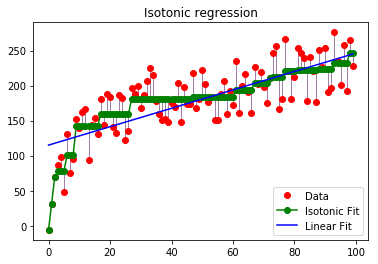

In [14]:
# print(__doc__)

# Author: Nelle Varoquaux <nelle.varoquaux@gmail.com>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
# Licence: BSD

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

n = 100
x = np.arange(n)
rs = check_random_state(0)
y = rs.randint(-50, 50, size=(n,)) + 50. * np.log(1 + np.arange(n))

###############################################################################
# Fit IsotonicRegression and LinearRegression models

ir = IsotonicRegression()

y_ = ir.fit_transform(x, y)

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression

###############################################################################
# plot result

segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(0.5 * np.ones(n))

fig = plt.figure()
plt.plot(x, y, 'r.', markersize=12)
plt.plot(x, y_, 'g.-', markersize=12)
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Isotonic regression')
plt.show()

In [ ]:
import urllib.request
import re,random
from multiprocessing.dummy import Pool as ThreadPool 
time_out = 3 # 全局变量 10 秒超时时间
count = 0
proxies = [None]
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1650.63 Safari/537.36'}
def get_proxy():
    # 使用全局变量,修改之
    global proxies
    try:
        req = urllib.request.Request('http://www.xicidaili.com/',None,headers)
    except:
        print('无法获取代理信息!')
        return
    response = urllib.request.urlopen(req)
    html = response.read().decode('utf-8')
    p = re.compile(r'''<tr\sclass[^>]*>\s+
                                    <td>.+</td>\s+
                                    <td>(.*)?</td>\s+
                                    <td>(.*)?</td>\s+
                                    <td>(.*)?</td>\s+
                                    <td>(.*)?</td>\s+
                                    <td>(.*)?</td>\s+
                                    <td>(.*)?</td>\s+
                                </tr>''',re.VERBOSE)
    proxy_list = p.findall(html)
    for each_proxy in proxy_list[1:]:
        if each_proxy[4] == 'HTTP':
            proxies.append(each_proxy[0]+':'+each_proxy[1])
def change_proxy():
    # 随机从序列中取出一个元素
    proxy = random.choice(proxies)
    # 判断元素是否合理
    if proxy == None:
        proxy_support = urllib.request.ProxyHandler({})
    else:
        proxy_support = urllib.request.ProxyHandler({'http':proxy})
    opener = urllib.request.build_opener(proxy_support)
    opener.addheaders = [('User-Agent',headers['User-Agent'])]
    urllib.request.install_opener(opener)
    print('智能切换代理：%s' % ('本机' if proxy==None else proxy))
def get_req(url):
    # 先伪造一下头部吧,使用字典
    blog_eader = {
                'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.152 Safari/537.36',
                'Host':'blog.csdn.net',
                'Referer':'http://blog.csdn.net/',
                'GET':url
                } 
    req = urllib.request.Request(url,headers = blog_eader)
    return req
# 访问 博客
def look_blog(url):
    # 切换一下IP
    change_proxy()
    req = get_req(url)
    try:
        urllib.request.urlopen(req,timeout = time_out)
    except:
        return
    else:
        print('访问成功!')
# 迭代访问
def click_blog(url):
    for i in range(0,count):
        if(i == count):
            break
        print('当前访问 Blog %s 第 %d 次' % (url,i))
        look_blog(url)
# 获取博客的文章链表
def get_blog_list(url):
    req = get_req(url)
    try:
        response = urllib.request.urlopen(req,timeout = time_out)
    except:
        print('无法挽回的错误')
        return None
    # 由于 Csdn 是 utf-8 所以不需要转码
    html = response.read()
    # 存储一个正则表达式 规则
    regx = '<span class="link_title"><a href="(.+?)">'
    pat = re.compile(regx)
    # 其实这里 写作 list1 = re.findall('<span class="link_title"><a href="(.+?)">',str(html)) 也是一样的结果
    blog_list = re.findall(pat,str(html))
    return blog_list
if __name__ == '__main__':
    global count
    # 基本参数初始化
    # 获取代理
    get_proxy()
    print('有效代理个数为 : %d' % len(proxies))
    blogurl = input('输入blog链接:')
    # 这个地方原本是我的默认输入偷懒用的
    if len(blogurl) == 0:
        blogurl = 'http://blog.csdn.net/bkxiaoc/'
    print('博客地址是:%s' % blogurl)
    try:
        count = int(input('输入次数:'))
    except ValueError:
        print('参数错误')
        quit() 
    if count == 0 or count > 999:
        print('次数过大或过小')
        quit()
    print('次数确认为 %d' % count)
    # 获取 博文 列表,由于测试时我的博文只有一页所以 只能获得一页的列表
    blog_list = get_blog_list(blogurl + '?viewmode=contents')
    if len(blog_list) == 0:
        print('未找到Blog列表')
        quit()
    print('启动!!!!!!!!!!!!!!!!!!!!')
    # 迭代一下 使用多线程
    index = 0
    for each_link in blog_list:
        # 补全头部
        each_link = 'http://blog.csdn.net' + each_link
        blog_list[index] = each_link
        index += 1
    # 有多少个帖子就开多少个线程的一半 let's go
    pool = ThreadPool(int(len(blog_list) / 2))
    results = pool.map(click_blog, blog_list)
    pool.close()
    pool.join()
    print('完成任务!!!!!!!!!!!!!!!!!!!!')

有效代理个数为 : 1


In [6]:
from bs4 import BeautifulSoup
import requests
import redis

url = 'http://www.socks-proxy.net/'

res = requests.get(url)

soup = BeautifulSoup(res.text, 'lxml')

trs = soup.select('tbody > tr')


que = redis.StrictRedis(host='10.120.37.118', port=6379, db=0, password='team1')
for tr in trs:
    tds = tr.select('td')
    print('socks5://{}:{}'.format(tds[0].text, tds[1].text))
    que.lpush('proxylist', 'socks5://{}:{}'.format(tds[0].text, tds[1].text))

socks5://187.64.158.83:10093
socks5://187.123.241.63:18490
socks5://173.214.156.42:45554
socks5://189.29.90.148:58871
socks5://87.100.225.10:45554
socks5://193.192.37.61:51408
socks5://179.210.78.217:65000
socks5://188.165.184.116:24632
socks5://179.157.14.213:48950
socks5://201.81.4.71:53096
socks5://189.100.247.12:18454
socks5://179.218.97.166:53250
socks5://79.122.217.238:1080
socks5://187.37.125.54:50285
socks5://179.218.129.183:12307
socks5://187.23.86.61:61268
socks5://125.93.75.245:1081
socks5://212.233.216.133:1080
socks5://189.63.161.170:17915
socks5://187.37.198.188:32743
socks5://179.158.132.203:13611
socks5://187.38.168.236:14532
socks5://164.132.65.174:24632
socks5://179.218.219.29:27321
socks5://94.23.149.141:24632
socks5://79.140.221.254:1080
socks5://201.81.95.42:37893
socks5://179.215.224.166:20751
socks5://187.22.31.38:42574
socks5://179.158.22.238:42766
socks5://177.82.252.67:20335
socks5://189.122.51.78:35914
socks5://177.81.54.227:34252
socks5://201.83.96.114:43871

In [10]:
#catch proxy from proxyURL then 
from bs4 import BeautifulSoup
import requests
import redis

url = 'http://www.socks-proxy.net/'

res = requests.get(url)

soup = BeautifulSoup(res.text, 'lxml')

trs = soup.select('tbody > tr')

que = redis.StrictRedis(host='172.17.0.2', port=6379, db=0)
    #python mapping redis
for tr in trs:
    tds = tr.select('td')
    print('socks5://{}:{}'.format(tds[0].text, tds[1].text))
    que.lpush('proxylist', 'socks5://{}:{}'.format(tds[0].text, tds[1].text))
        #redis use lpush() to push redislist [Version : IP Address]
        
# Q1 : container port -p 對應到 host http port
# 6389是對應到host多少port(6389)
# container對應後用python push "IP Address" 到docker儲存

socks5://67.197.245.93:33119


ConnectionError: Error 10060 connecting to 172.17.0.2:6379. 連線嘗試失敗，因為連線對象有一段時間並未正確回應，或是連線建立失敗，因為連線的主機無法回應。.